## [作業重點]
目前你應該已經要很清楚資料集中，資料的型態是什麼樣子囉！包含特徵 (features) 與標籤 (labels)。因此要記得未來不管什麼專案，必須要把資料清理成相同的格式，才能送進模型訓練。
今天的作業開始踏入決策樹這個非常重要的模型，請務必確保你理解模型中每個超參數的意思，並試著調整看看，對最終預測結果的影響為何

## 作業

In [1]:
import numpy as np
import pandas as pd
from sklearn import datasets, metrics
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
plt.style.use('seaborn')

### 1. 試著調整 DecisionTreeClassifier(...) 中的參數，並觀察是否會改變結果？

In [2]:
iris = datasets.load_iris()
print(iris.feature_names) # 印出所有的特徵

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


#### 嘗試調整下列參數
- criterion: 衡量量資料相似程度的 metric
- max_depth: 樹能⽣生長的最深限制
- min_samples_split: ⾄至少要多少樣本以上才進⾏行行切分
- min_samples_leaf: 最終的葉⼦子 (節點) 上⾄至少要有多少樣本

In [21]:
x_train, x_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size = 0.2, random_state = 42)

tr_clf = DecisionTreeClassifier(criterion = 'gini',
                                max_depth = None,
                                min_samples_split = 2,
                                min_samples_leaf = 1,
                                random_state = 42)

tr_clf.fit(x_train, y_train)

y_pred = tr_clf.predict(x_test)

In [22]:
print(f'train accuracy: {metrics.accuracy_score(tr_clf.predict(x_train), y_train)}')
print(f'test accuracy: {metrics.accuracy_score(y_pred, y_test)}')

train accuracy: 1.0
test accuracy: 1.0


#### Visulization

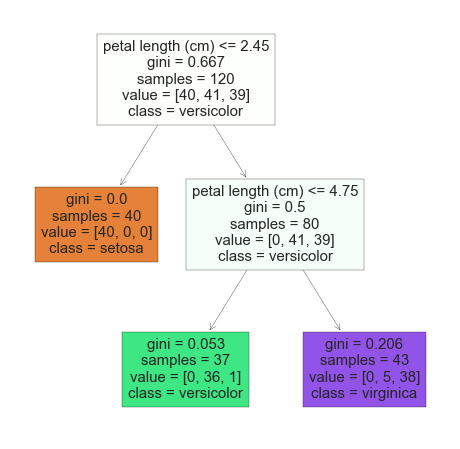

In [5]:
plt.figure(figsize = (8,8)) # max_depth = 2 時的視覺化
tree.plot_tree(tr_clf, filled = True, 
               feature_names = iris.feature_names,
               class_names = iris.target_names)
plt.show()

In [23]:
FI = pd.DataFrame({'Feature':iris.feature_names, 'Importance':tr_clf.feature_importances_})
FI.sort_values(by = 'Importance', ascending = False) # Petal length 是最重要的特徵

,Feature,Importance
2,petal length (cm),0.906143
3,petal width (cm),0.077186
1,sepal width (cm),0.016670
0,sepal length (cm),0.000000


### 2. 改用其他資料集 (boston, wine)，並與回歸模型的結果進行比較

In [7]:
boston = datasets.load_boston() # 讀取波士頓房價（Boston house prices dataset）

In [8]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

### Baseline: 直接使用原本的13個特徵代入決策樹模型
> 結果：對於訓練資料來說，如果調整適當的參數（如：深度），決策樹可以完美的擬合；然而在測試資料上卻做的非常差，代表模型過適（Overfitting）！

In [19]:
x_train, x_test, y_train, y_test = train_test_split(boston.data, boston.target, test_size = 0.2, random_state = 42)

# 當樹枝深度越深，train loss可以越低，test loss則可能越高
# 當不設定最大樹枝深度(max_depth)時，幾乎可以完美的擬合訓練資料，但是在測試資料則沒辦法
tr_reg = DecisionTreeRegressor(criterion = 'mse',
                               max_depth = None, 
                               min_samples_split = 2,
                               min_samples_leaf = 1,
                               random_state = 42)

tr_reg.fit(x_train, y_train)

y_pred = tr_reg.predict(x_test)

In [20]:
print(f'train loss: {metrics.mean_squared_error(tr_reg.predict(x_train), y_train)}')
print(f'train R square: {tr_reg.score(x_train, y_train)}\n')
print(f'test loss: {metrics.mean_squared_error(y_pred, y_test)}')
print(f'test R square: {metrics.r2_score(y_pred, y_test)}')

train loss: 0.0
train R square: 1.0

test loss: 16.5021568627451
test R square: 0.7814289090462545


#### Visulization

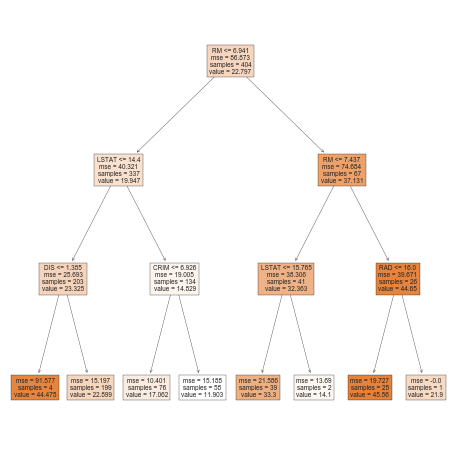

In [11]:
plt.figure(figsize = (8,8)) # tree_depth = 3 的視覺化
tree.plot_tree(tr_reg, filled = True, 
               feature_names = boston.feature_names)
plt.show()

#### Feature Importance

In [12]:
FI = pd.DataFrame({'Feature':boston.feature_names, 'Importance':tr_reg.feature_importances_})
FI.sort_values(by = 'Importance', ascending = False) # RM 是最重要的特徵

,Feature,Importance
5,RM,0.659397
12,LSTAT,0.227641
7,DIS,0.063661
0,CRIM,0.030528
8,RAD,0.018773
1,ZN,0.000000
2,INDUS,0.000000
3,CHAS,0.000000
4,NOX,0.000000
6,AGE,0.000000
